# Logistic Regression and KNN Regressor Modeling

## Prince Praveen



# Dataset : NASA JPL Asteroid Dataset - From Kaggle

Link to the dataset: https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset?resource=download

### Context: 
The NASA JPL Asteroid Dataset, sourced from Kaggle, contains valuable data on various asteroids, including physical characteristics, orbital information, and whether they are classified as hazardous. Given the increasing interest in space exploration and planetary defense, analyzing the properties of asteroids has become crucial for identifying potential threats to Earth.


# Data Loading and Cleaning

In [1]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [19]:
#import the data into a dataframe
df = pd.read_csv('./dataset.csv')

# Display the total dataset size (rows, columns)
print("Dataset size:", df.shape)

C:\Users\princ\AppData\Local\Temp\ipykernel_7672\3507848095.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset.csv')


Dataset size: (958524, 45)


In [5]:
#Checking for null values in our dataset
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


## Handling Null/Missing Values
Here are the steps that I will take for data cleaning and preparation.
1. Drop rows that have more than 33% missing values.
2. Drop columns that have more than 40% missing values.
3. For numeric missing data, we can impute new values by taking the mean of that column.
4. For categorical missing data, we can impute values by  taking the mode (most occuring value) of that column.

In [7]:
# Number of columns
total_columns = df.shape[1]

# Threshold for 33% missing values
threshold = 0.33 * total_columns

# Count rows with more than 33% missing values
rows_with_missing_values = df[df.isnull().sum(axis=1) > threshold]

# Display the count
print("Number of rows with more than 33% missing values:", rows_with_missing_values.shape[0])


Number of rows with more than 33% missing values: 19922


In [11]:
# Drop rows with more than 33% missing values
df_cleaned = df[df.isnull().sum(axis=1) <= threshold]

# Check the new dataset size after dropping
print("Dataset size after dropping rows with more than 33% missing values:", df_cleaned.shape)

Dataset size after dropping rows with more than 33% missing values: (938602, 45)


In [12]:
# Threshold for 40% missing values
threshold_40 = 0.40 * len(df)

# Identify columns with more than 40% missing values
columns_with_missing_values = df.columns[df.isnull().sum() > threshold_40]

# Print the columns
print("Columns with more than 40% missing values:")
print(columns_with_missing_values)

Columns with more than 40% missing values:
Index(['name', 'prefix', 'diameter', 'albedo', 'diameter_sigma'], dtype='object')


In [13]:
# Drop all columns with more than 40% missing values except 'name' and 'prefix'
columns_to_drop = columns_with_missing_values.drop(['name', 'prefix'])

# Drop the selected columns from the dataframe
df_cleaned = df.drop(columns=columns_to_drop)

# Check the new dataframe columns
print("Remaining columns after dropping:")
print(df_cleaned.columns)

Remaining columns after dropping:
Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid',
       'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om',
       'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'class', 'rms'],
      dtype='object')


In [15]:
#Checking for null values in our dataset
df_cleaned.isnull().sum()

id                0
spkid             0
full_name         0
pdes              0
name         936460
prefix       958506
neo               4
pha           19921
H              6263
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
equinox           0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                1
ad                4
n                 0
tp                0
tp_cal            0
per               4
per_y             1
moid          19921
moid_ld         127
sigma_e       19922
sigma_a       19922
sigma_q       19922
sigma_i       19922
sigma_om      19922
sigma_w       19922
sigma_ma      19922
sigma_ad      19926
sigma_n       19922
sigma_tp      19922
sigma_per     19926
class             0
rms               2
dtype: int64

Now, let us fill numeric missing values with the mean of their respective columns

In [16]:
# List of columns starting with 'sigma_' that have missing values
sigma_columns = [col for col in df_cleaned.columns if col.startswith('sigma_')]

# Fill missing values in each sigma column with the mean of the respective column
df_cleaned[sigma_columns] = df_cleaned[sigma_columns].apply(lambda col: col.fillna(col.mean()))

# Check if the missing values are filled
print(df_cleaned[sigma_columns].isnull().sum())

sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
dtype: int64


In [17]:
df_cleaned.isnull().sum()

id                0
spkid             0
full_name         0
pdes              0
name         936460
prefix       958506
neo               4
pha           19921
H              6263
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
equinox           0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                1
ad                4
n                 0
tp                0
tp_cal            0
per               4
per_y             1
moid          19921
moid_ld         127
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               2
dtype: int64

In [20]:
df_cleaned.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,orbit_id,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,JPL 47,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,JPL 37,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,JPL 112,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,JPL 35,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,JPL 114,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


### Categorical Missing Values

Now, let us process the categorical missing values. Take a look at neo(Near Earth Object Flag) and pha(Potentially Hazardous Asteroid flag). 
Since these are categorical values, we cannot fill mean of their respective columns. One option is to use the mode, the most frequently occuring value, of that respective column to fill the null values. 
Let us see the pha column. At first, replacing null with mode seemed like a good idea, but we might fill incorrect values in our dataset.

### Decision
I have made a decision to drop those missing 19921 values rather than replacing them. This is because pha is a very important column as I will be using it for predicting whether certain asteroids are hazardious for us or not. I don't want to add wrong information to my dataset which might affect my model's performance later.

In [21]:
# Drop rows where 'pha' is null
df_cleaned = df_cleaned.dropna(subset=['pha'])

# Check the dataset size after dropping
print("Dataset size after dropping rows with null 'pha':", df_cleaned.shape)

Dataset size after dropping rows with null 'pha': (938603, 42)


For 'neo' , we will fill missing values as the mode of that column. I am doing this to demonstrate that we do have an option of filling missing values with mode

In [23]:
# Calculate the mode of the 'neo' column
neo_mode = df_cleaned['neo'].mode()[0]

# Fill missing values in 'neo' with the mode
df_cleaned['neo'] = df_cleaned['neo'].fillna(neo_mode)

# Check if missing values are filled
print('Missing Values count in NEO column')
print(df_cleaned['neo'].isnull().sum())

Missing Values count in NEO column
0


In [24]:
df_cleaned.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,orbit_id,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,JPL 47,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,JPL 37,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,JPL 112,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,JPL 35,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,JPL 114,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


### Feature Encoding for Categorical Variables

For columns 'pha' and 'neo', we will do an ordinal encoding as there is an order in the values. 

Column : 'pha' 

In [25]:
# Map the 'pha' values to 0 and 1
df_cleaned['pha'] = df_cleaned['pha'].map({'N': 0, 'Y': 1})

# Check the unique values in the 'pha' column to confirm the encoding
print(df_cleaned['pha'].unique())

[0 1]


Column 'neo'

In [27]:
# Map the 'pha' values to 0 and 1
df_cleaned['neo'] = df_cleaned['neo'].map({'N': 0, 'Y': 1})

# Check the unique values in the 'pha' column to confirm the encoding
print(df_cleaned['neo'].unique())

[0 1]


For column 'class', we can use one-hot encoding as there isn't any order to the values. They simply belong to any of the possible classes

In [30]:
# Apply one-hot encoding to the 'class' column in df_cleaned
df_cleaned = pd.get_dummies(df_cleaned, columns=['class'], drop_first=True)

# Check the updated DataFrame with one-hot encoded columns
print(df_cleaned.head())

         id    spkid       full_name pdes     name prefix  neo  pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN    0    0  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN    0    0  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN    0    0  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN    0    0  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN    0    0  6.90   

  orbit_id  ...  class_ATE  class_CEN  class_HYA class_IEO  class_IMB  \
0   JPL 47  ...          0          0          0         0          0   
1   JPL 37  ...          0          0          0         0          0   
2  JPL 112  ...          0          0          0         0          0   
3   JPL 35  ...          0          0          0         0          0   
4  JPL 114  ...          0          0          0         0          0   

   class_MBA  class_MCA  class_OMB  class_TJN  class_TNO  
0          1          0          0     

## Feature Selection

Our dataset has a lot of columns and I am primarily focused on predicting whether an asteroid falls in the category of pha or not. For that, we will select some important features as our independent variable X. 
1. H (Absolute Magnitude): This gives us insight into the size/brightness of the asteroid, which is often a key factor in hazard classification.

2. moid (Minimum Orbit Intersection Distance): The distance between the asteroid’s orbit and Earth’s orbit is crucial for assessing potential danger.

3. a (Semi-Major Axis): The average distance of the asteroid from the sun could be relevant for hazard prediction.

4. q (Perihelion Distance): How close the asteroid comes to the sun could indicate how its orbit interacts with Earth’s orbit.

5. i (Inclination): The tilt of the orbit might indicate whether the asteroid’s path crosses near Earth's orbit.

6. sigma_e (uncertainty in eccentricity) as the uncertainty feature, as eccentricity is a core orbital parameter.

In [33]:
#Independent Variable X
X = df_cleaned[['H', 'moid', 'a', 'q', 'i', 'sigma_e']]

# Target, dependent variable y
y = df_cleaned['pha']  

# Perform the train-test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (750882, 6) (750882,)
Test set shape: (187721, 6) (187721,)


## Variable Scaling

Now, we can perform scaling by using standardization of our numeric variables. We are performing this step after the test-train split to avoid data leakage.

In [34]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

#### Hyperparameter Tuning
We will use GridSearchCV to find the best regularization parameter C.

In [35]:
# Importing the required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [39]:
X.isnull().sum()

H          6262
moid          0
a             0
q             0
i             0
sigma_e       0
dtype: int64

Since we missed filling null values for 'H' column, let us do that now by filling it by mean of the column

In [40]:
# Calculate the mean of the 'H' column
mean_H = X['H'].mean()  

# Fill NaN values in 'H' with the mean
X['H'] = X['H'].fillna(mean_H)  

C:\Users\princ\AppData\Local\Temp\ipykernel_7672\3467269834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['H'] = X['H'].fillna(mean_H)


In [41]:
# Checking for NaNs again
print(X.isnull().sum())

H          0
moid       0
a          0
q          0
i          0
sigma_e    0
dtype: int64


In [55]:

# Define the parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1')

# Fit the model on the training data
grid_search_lr.fit(X_train, y_train)

# Best parameters for logistic regression
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


C:\Users\princ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\princ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\princ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\princ\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\princ\anaconda3\

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Error!

Error suggests that there are some Nan, infinity or large valuues in our dataset. Let us check and fix that.


In [56]:
# Check for infinite values in X_train
infinity_check = np.isinf(X_train).sum()
print("Infinite values in X_train:\n", infinity_check)


Infinite values in X_train:
 H          0
moid       0
a          0
q          0
i          0
sigma_e    0
dtype: int64


In [57]:
# Check for null values in X_train
null_check = X_train.isnull().sum()
print("Null values in X_train:\n", null_check)


Null values in X_train:
 H          5004
moid          0
a             0
q             0
i             0
sigma_e       0
dtype: int64


In [58]:
# Calculate the mean of the 'H' column (excluding nulls)
mean_H = X_train['H'].mean()

# Fill null values in 'H' with the calculated mean
X_train['H'].fillna(mean_H, inplace=True)

In [59]:
# Check for null values in X_train again
null_check_after = X_train.isnull().sum()
print("Null values in X_train after filling:\n", null_check_after)


Null values in X_train after filling:
 H          0
moid       0
a          0
q          0
i          0
sigma_e    0
dtype: int64


In [60]:

# Define the parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1')

# Fit the model on the training data
grid_search_lr.fit(X_train, y_train)

# Best parameters for logistic regression
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


Best parameters for Logistic Regression: {'C': 100}


Let us remove null values from X_test as well

In [63]:
# Check for null values in X_test
null_check = X_test.isnull().sum()
print("Null values in X_train:\n", null_check)

Null values in X_train:
 H          1258
moid          0
a             0
q             0
i             0
sigma_e       0
dtype: int64


In [65]:
# Calculate the mean of the 'H' column (excluding nulls)
mean_H = X_test['H'].mean()

# Fill null values in 'H' with the calculated mean
X_test['H'].fillna(mean_H, inplace=True)

In [66]:
# Check for null values in X_train again
null_check_after = X_test.isnull().sum()
print("Null values in X_train after filling:\n", null_check_after)


Null values in X_train after filling:
 H          0
moid       0
a          0
q          0
i          0
sigma_e    0
dtype: int64


In [67]:
# Predicting on the test set
y_pred = grid_search_lr.predict(X_test)

## Logistic Regressor Model Evaluation

In [69]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

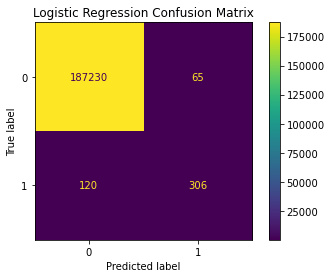

Logistic Regression Metrics:
Accuracy: 0.9990
Precision: 0.8248
Recall: 0.7183
F1 Score: 0.7679


In [71]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

### Key Takeaways

#### True Negative : 187230 --> When it correctly predicted 0
#### True Positive : 306 --> When it correctly predicted 1
#### False Positive : 65 --> when it incorrectly predicted 1
#### False Negative : 120 --> When it incorrectly predicted 0


### Important Consideration:

In the case of asteroids, let us measure the importance of false negatives and false positives and try to answer whether both have an equal weight. False negatives mean that our model predicted an asteroid to be not hazardious but it actually is. This may lead us to ignore the threat and that can be extremely dangerous. False positives, on the other hand, might lead us to spend unnecessary funds but in the end it will be a learning lesson and it won't be fatal. 
So ideally we should try and minimize false negatives, even if it comes at the cost of a little accuracy.



# KNN Model:

Now, let us model our data using KNN classifier and check its predictions so we can compare it with Logistic regression

In [72]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Define the parameter grid for KNN
param_grid_knn = {'n_neighbors': range(1, 21)}

# Initialize the KNN model
knn_model_knn = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN model
grid_search_knn = GridSearchCV(knn_model_knn, param_grid_knn, cv=5, scoring='f1')

# Fit the model on the training data
grid_search_knn.fit(X_train, y_train)

# Best parameters for KNN
print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)

Best parameters for K-Nearest Neighbors: {'n_neighbors': 1}


In [74]:
# Get the best model
best_knn_model = grid_search_knn.best_estimator_

In [75]:
# Make predictions using the best KNN model
y_pred_knn = best_knn_model.predict(X_test)

### KNN Model Evaluation


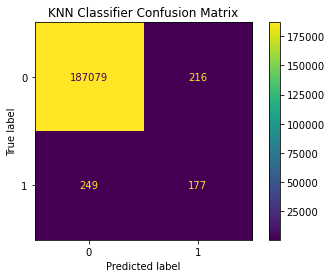

KNN Classifier Metrics:
Accuracy: 0.9975
Precision: 0.4504
Recall: 0.4155
F1 Score: 0.4322


In [76]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("KNN Classifier Confusion Matrix")
plt.show()

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN Classifier Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

### Key Takeaways

#### True Negative : 187079 --> When it correctly predicted 0
#### True Positive : 177 --> When it correctly predicted 1
#### False Positive : 216 --> when it incorrectly predicted 1
#### False Negative : 249 --> When it incorrectly predicted 0




# Confusion Matrix Evaluation for both Models

Summarizing what we've got so far

## Logistic Regression Model:

Confusion Matrix:
1. True Negative : 187230 
2. True Positive : 306 
3. False Positive : 65 
4. False Negative : 120 

Model Performance
1. Accuracy: 0.9990
2. Precision: 0.8248
3. Recall: 0.7183
4. F1 Score: 0.7679

-----------------------------------------------------------------------------------------------

## KNN Model

Confusion Matrix:
1. True Negative : 187079 
2. True Positive : 177 
3. False Positive : 216
4. False Negative : 249

Model Performance
1. Accuracy: 0.9975
2. Precision: 0.4504
3. Recall: 0.4155
4. F1 Score: 0.4322


# False Positives & False Negatives

False Positive: We predicted an asteroid to be hazardious when it actually wasn't.
False Negative: We predicted an asteroid to be safe i.e non-hazardious when it actually was!

Implications? 
Well, I would say that it is quite clear that false negatives could potentially lead to fatal scenarios!
In cases of false negatives, we might ignore an asteroid that could cause a lot of harm by thinking that it was safe. A lot of prevention and safety measures would be avoided which could have saved lifes.
A false positive, however in my opinion, is not as dangerous. Yes, it might lead us to spend a lot of money and resources on studying that asteroid and to prepare ways to help ourselves, but in the end it will add to a learning experience and won't cause potential loss of lives.
Thus, I feel like we must go with a model that tries to minimize false negatives, even if it comes at a cost of reduced accuracy.

# Final Thoughts and Conclusion 

### Model Comparison

The model performance measures such as F1 score, accuracy, precision and recall suggests our logistic regressor model did a better job at predicting pha values correctly. 

As mentioned above, I think false negatives play a more important role in determining which model to select. If I had to improve my models, I would focus on maximizing Recall value. 

1. Recall = True Positive / (True Positive + False Negative)

From the above formula, it is clear that in order to maximize Recall value, we will have to reduce i.e minimize the False Negatives, which I think is very important for this context.

Thus, I can say from the two models that we created above, I would prefer the logistic regressor model and we can further try to improve that model. My goal would be to focus on maximizing the Recall value of the model.